In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
 from tensorflow.keras import models,layers


In [3]:
BATCH_SIZE=32
IMAGE_SIZE=350
CHANNELS=3
EPOCHS=50

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
  "Segmented Medicinal Leaf Images",
  shuffle=True,
  image_size=(IMAGE_SIZE,IMAGE_SIZE),
  batch_size=BATCH_SIZE
)

Found 1836 files belonging to 30 classes.


In [5]:
class_names=dataset.class_names
class_names


['Arive-Dantu',
 'Basale',
 'Betel',
 'Crape_Jasmine',
 'Curry',
 'Drumstick',
 'Fenugreek',
 'Guava',
 'Hibiscus',
 'Indian_Beech',
 'Indian_Mustard',
 'Jackfruit',
 'Jamaica_Cherry-Gasagase',
 'Jamun',
 'Jasmine',
 'Karanda',
 'Lemon',
 'Mango',
 'Mexican_Mint',
 'Mint',
 'Neem',
 'Oleander',
 'Parijata',
 'Peepal',
 'Pomegranate',
 'Rasna',
 'Rose_apple',
 'Roxburgh_fig',
 'Sandalwood',
 'Tulsi']

(32, 350, 350, 3)
[28  1 14 20  0 26 24 11  4 23  0 19 22  0 14 26  4  5 16 17 29  9 24 16
  5 21 19  1  3 14 13 13]


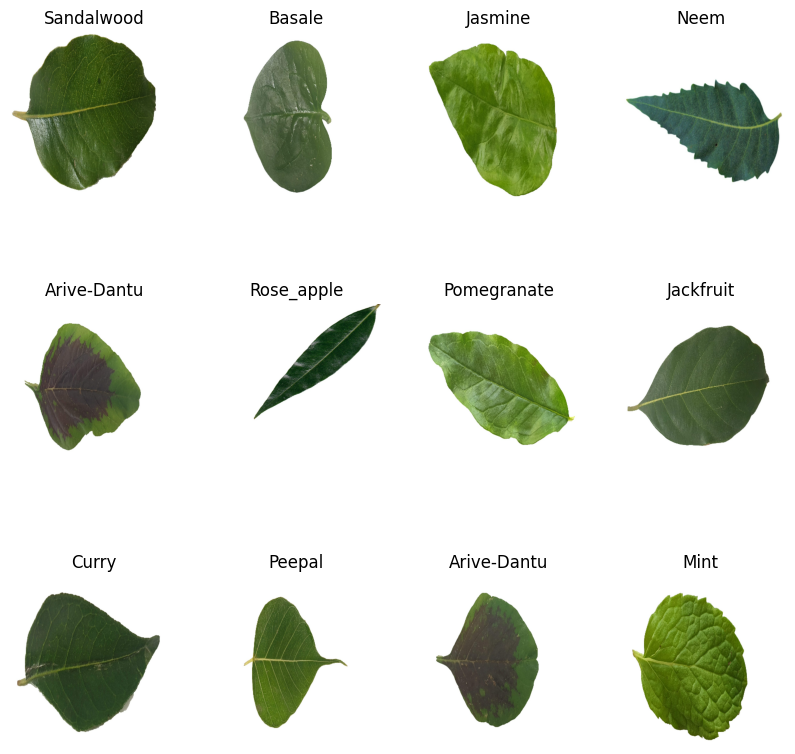

In [6]:
plt.figure(figsize=(10,10))
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [7]:
# 80%-->training
# 20-->test then divide further okk
#   10%-->validation
#   10%-->test


In [8]:
train_size=0.8
len(dataset)*train_size

46.400000000000006

In [9]:
train_ds=dataset.take(46)
len(train_ds)


46

In [10]:
test_ds=dataset.skip(46)
len(test_ds)

12

In [11]:
val_size=0.1
len(dataset)*val_size

5.800000000000001

In [12]:
val_ds=test_ds.take(5)
len(val_ds)

5

In [13]:
test_ds=test_ds.skip(5)
len(val_ds)

5

In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
#     seed se shuffle m predictibility milti h 
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [16]:
len(train_ds)

46

In [17]:
len(val_ds)

5

In [18]:
len(test_ds)

7

In [19]:
# in tensorflow har ek element ek batch se denote krte h 
46*32

1472

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch[0].numpy().shape)

(350, 350, 3)


In [22]:
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  tf.keras.layers.Rescaling(1./350),
])


In [23]:
# Define data augmentation pipeline
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [24]:
# model building start here in this part
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 30

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

c:\Users\yash2\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 350, 350, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 348, 348, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 174, 174, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 172, 172, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 86, 86, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 84, 84, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 42, 42, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 40, 40, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 20, 20, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 18, 18, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 9, 9, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 7, 7, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 3, 3, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 576)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 30)               │         1,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,982 (804.62 KB)

 Trainable params: 205,982 (804.62 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)
# to train the dataset ok

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 32s 650ms/step - accuracy: 0.0574 - loss: 3.3735 - val_accuracy: 0.1937 - val_loss: 2.8064
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 31s 663ms/step - accuracy: 0.2760 - loss: 2.5896 - val_accuracy: 0.4688 - val_loss: 1.8320
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 29s 636ms/step - accuracy: 0.5310 - loss: 1.6110 - val_accuracy: 0.5500 - val_loss: 1.4630
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 30s 658ms/step - accuracy: 0.6317 - loss: 1.2559 - val_accuracy: 0.6938 - val_loss: 1.0532
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 29s 638ms/step - accuracy: 0.7202 - loss: 0.9377 - val_accuracy: 0.7188 - val_loss: 0.9525
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 29s 638ms/step - accuracy: 0.7493 - loss: 0.7770 - val_accuracy: 0.8125 - val_loss: 0.6948
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 30s 644ms/step - accuracy: 0.7623 - loss: 0.7384 - val_accuracy: 0.8250 - val_loss: 0.5919
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 29s 642ms/step - accuracy: 0.8148 - loss: 0.5741 - val_accu

In [28]:
scores=model.evaluate(test_ds)


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 283ms/step - accuracy: 0.9586 - loss: 0.4260


In [29]:
scores
    

[0.4174613952636719, 0.9508928656578064]

In [30]:
history

In [31]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [32]:
type(history.history['loss'])


list

In [33]:
len(history.history['loss'])

50

In [34]:
history.history['loss'][:5] # show loss for first 5 epochs

[3.288252830505371,
 2.374472141265869,
 1.5691543817520142,
 1.2304980754852295,
 0.9798165559768677]

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

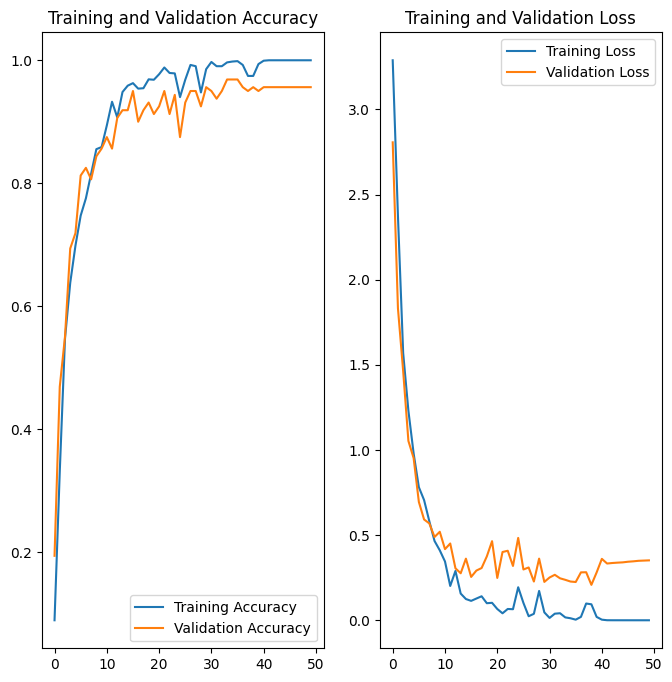

In [36]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Guava
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
predicted label: Guava


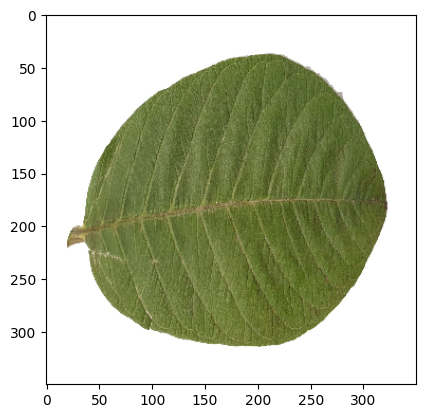

In [37]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [38]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


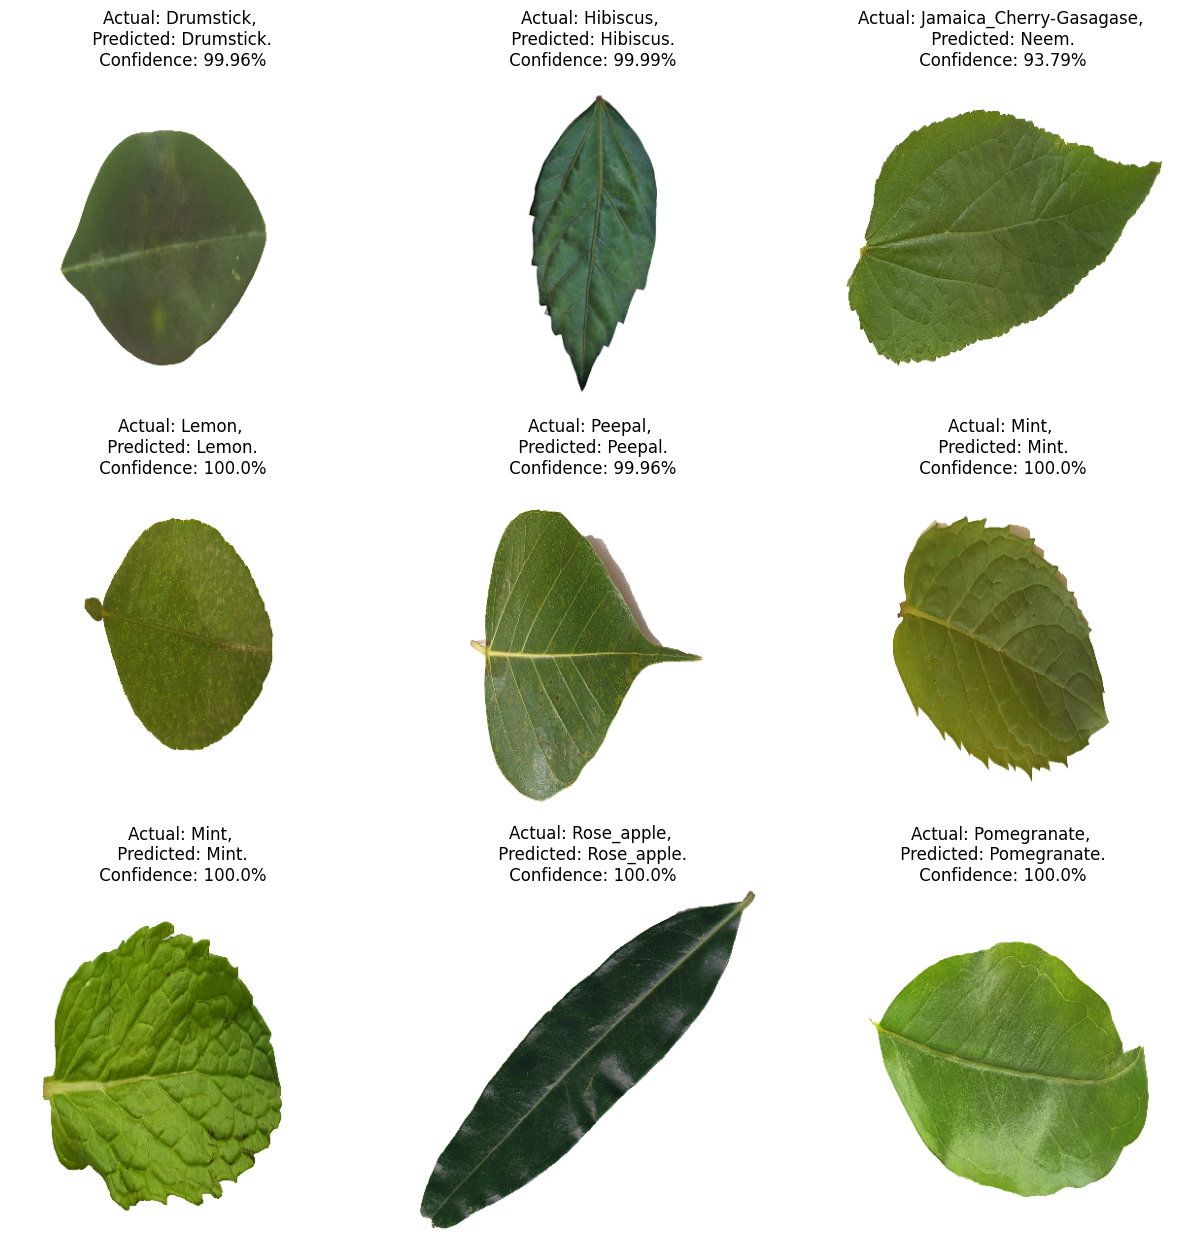

In [39]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [40]:
model.save('my_model.keras')

In [41]:
image_path = r'C:\Users\yash2\Desktop\8055.jpeg'



In [ ]:
import numpy as np

# Define class names as a dictionary
class_names = {
    0: 'Class 1',
    1: 'Class 2',
    2: 'Class 3',
    3: 'Class 4',
    4: 'Class 5',
    5: 'Class 6',
    6: 'Class 7',
    7: 'Class 8',
    8: 'Class 9',
    9: 'Class 10',
    10: 'Class 11',
    11: 'Class 12',
    12: 'Class 13',
    13: 'Class 14',
    14: 'Class 15',
    15: 'Class 16',
    16: 'Class 17',
    17: 'Class 18',
    18: 'Class 19',
    19: 'Class 20',
    20: 'Class 21',
    21: 'Class 22',
    22: 'Class 23',
    23: 'Class 24',
    24: 'Class 25',
    25: 'Class 26',
    26: 'Class 27',
    27: 'Class 28',
    28: 'Class 29',
    29: 'Class 30',
    
     
    
    
}

# Assuming 'predictions' is defined somewhere in your code
def get_prediction_confidence(predictions):
    predicted_class = np.argmax(predictions[0])
    return class_names[predicted_class], predictions[0][predicted_class]

# Example usage
predictions = np.array([[0.2, 0.8, 0.1]])  # Example prediction probabilities
class_name, confidence = get_prediction_confidence(predictions)
print(f"Predicted class: {class_name}, Confidence: {confidence}")


Predicted class: Class 2, Confidence: 0.8
